In [1]:
import numpy as np
import pandas as pd
import os
import time
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
import gc
import pickle
from tqdm.auto import tqdm

import warnings
warnings.filterwarnings("ignore")

In [2]:
STORES = ['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3']
DEPTS = ['HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2', 'FOODS_1', 'FOODS_2', 'FOODS_3']
model_dir = './models_store_dept/'

In [3]:
model_features = ['item_id',
                 'weekday',
                 'month',
                 'year',
                 'event_name_1',
                 'event_type_1',
                 'event_name_2',
                 'event_type_2',
                 'snap_CA',
                 'snap_TX',
                 'snap_WI',
                 'day',
                 'week_in_month',
                 'is_weekend',
                 'sell_price',
                 'sales_28_lag',
                 'sales_31_lag',
                 'sales_34_lag',
                 'sales_37_lag',
                 'sales_40_lag',
                 'sales_7_rolling_mean',
                 'sales_7_rolling_std',
                 'sales_30_rolling_mean',
                 'sales_30_rolling_std',
                 'sales_60_rolling_mean',
                 'sales_60_rolling_std',
                 'sales_90_rolling_mean',
                 'sales_90_rolling_std',
                 'sales_180_rolling_mean',
                 'sales_180_rolling_std'
                 ]

In [4]:
feature_imps = []
for store in STORES:
    for state in DEPTS:
        # print('starting:',store,state)
        
        # load model
        model_name = store+'_'+state+'.bin'
        model = pickle.load(open(os.path.join(model_dir,model_name),"rb"))
        feature_imp = model.feature_importance()
        feature_imps.append(feature_imp)
feature_imps = np.array(feature_imps)
feature_imps = feature_imps.mean(axis=0)

In [5]:
feat_imps = pd.DataFrame(sorted(zip(feature_imps,model_features)), columns=['Value','Feature'])

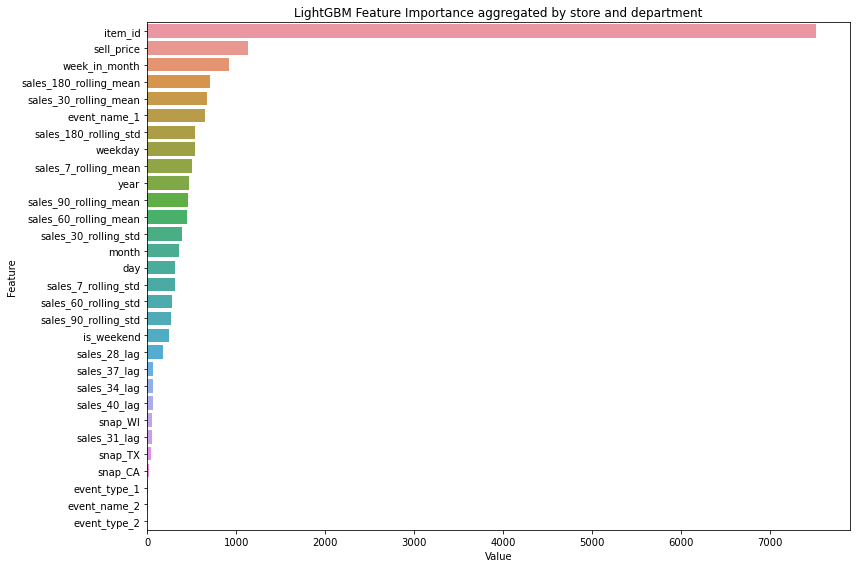

In [6]:
# visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x="Value", y="Feature", data=feat_imps.sort_values(by="Value", ascending=False))
plt.title('LightGBM Feature Importance aggregated by store and department')
plt.tight_layout()
plt.savefig('lgbm_importance_store_dept.png')
plt.show()

In [7]:
STORES = ['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3']
CATEGORIES = ['HOBBIES', 'HOUSEHOLD', 'FOODS']
model_dir = './models_store_cat/'

In [8]:
model_features = ['item_id',
                 'dept_id',
                 'weekday',
                 'month',
                 'year',
                 'event_name_1',
                 'event_type_1',
                 'event_name_2',
                 'event_type_2',
                 'snap_CA',
                 'snap_TX',
                 'snap_WI',
                 'day',
                 'week_in_month',
                 'is_weekend',
                 'sell_price',
                 'sales_28_lag',
                 'sales_31_lag',
                 'sales_34_lag',
                 'sales_37_lag',
                 'sales_40_lag',
                 'sales_7_rolling_mean',
                 'sales_7_rolling_std',
                 'sales_30_rolling_mean',
                 'sales_30_rolling_std',
                 'sales_60_rolling_mean',
                 'sales_60_rolling_std',
                 'sales_90_rolling_mean',
                 'sales_90_rolling_std',
                 'sales_180_rolling_mean',
                 'sales_180_rolling_std'
                 ]

In [9]:
feature_imps = []
for store in STORES:
    for category in CATEGORIES:
        # print('starting:',store,category)
        
        # load model
        model_name = store+'_'+category+'.bin'
        model = pickle.load(open(os.path.join(model_dir,model_name),"rb"))
        feature_imp = model.feature_importance()
        feature_imps.append(feature_imp)
feature_imps = np.array(feature_imps)
feature_imps = feature_imps.mean(axis=0)

In [10]:
feat_imps = pd.DataFrame(sorted(zip(feature_imps,model_features)), columns=['Value','Feature'])

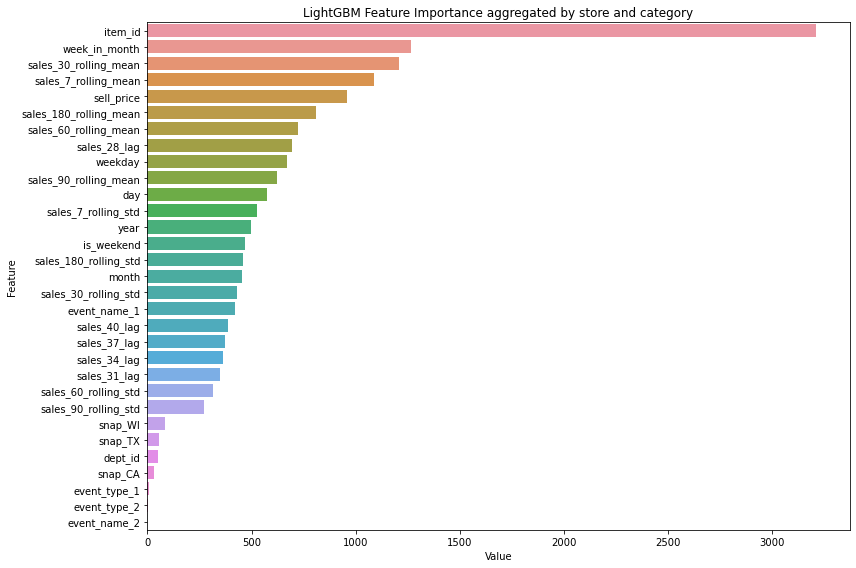

In [11]:
# visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x="Value", y="Feature", data=feat_imps.sort_values(by="Value", ascending=False))
plt.title('LightGBM Feature Importance aggregated by store and category')
plt.tight_layout()
plt.savefig('lgbm_importance_store_cat.png')
plt.show()

In [12]:
STORES = ['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3']
model_dir = './models_store/'

In [13]:
model_features = ['item_id',
                 'dept_id',
                 'cat_id',
                 'weekday',
                 'month',
                 'year',
                 'event_name_1',
                 'event_type_1',
                 'event_name_2',
                 'event_type_2',
                 'snap_CA',
                 'snap_TX',
                 'snap_WI',
                 'day',
                 'week_in_month',
                 'is_weekend',
                 'sell_price',
                 'sales_28_lag',
                 'sales_31_lag',
                 'sales_34_lag',
                 'sales_37_lag',
                 'sales_40_lag',
                 'sales_7_rolling_mean',
                 'sales_7_rolling_std',
                 'sales_30_rolling_mean',
                 'sales_30_rolling_std',
                 'sales_60_rolling_mean',
                 'sales_60_rolling_std',
                 'sales_90_rolling_mean',
                 'sales_90_rolling_std',
                 'sales_180_rolling_mean',
                 'sales_180_rolling_std'
                 ]

In [14]:
feature_imps = []
for store in STORES:
    # print('starting:',store)

    # load model
    model_name = store+'_'+'.bin'
    model = pickle.load(open(os.path.join(model_dir,model_name),"rb"))
    feature_imp = model.feature_importance()
    feature_imps.append(feature_imp)
feature_imps = np.array(feature_imps)
feature_imps = feature_imps.mean(axis=0)

In [15]:
feat_imps = pd.DataFrame(sorted(zip(feature_imps,model_features)), columns=['Value','Feature'])

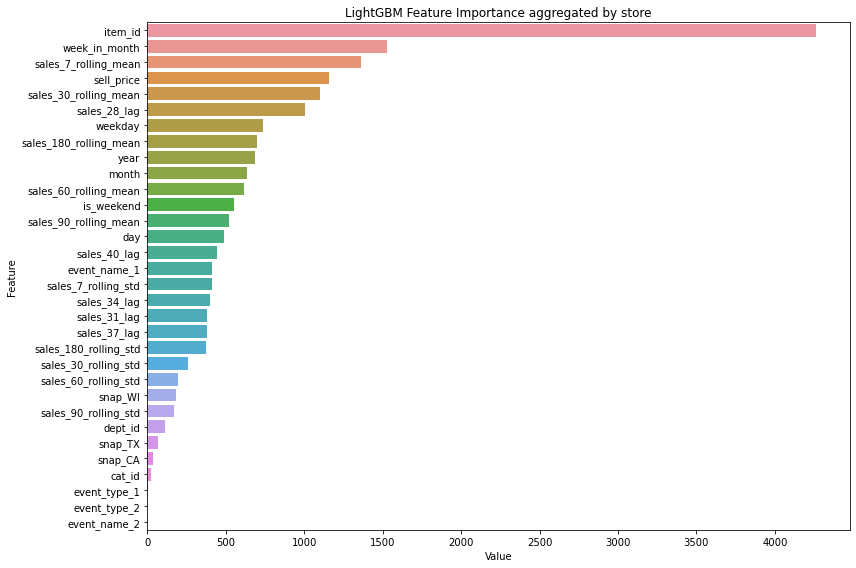

In [16]:
# visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x="Value", y="Feature", data=feat_imps.sort_values(by="Value", ascending=False))
plt.title('LightGBM Feature Importance aggregated by store')
plt.tight_layout()
plt.savefig('lgbm_importance_store.png')
plt.show()